In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


assignment make blobs data kmean,elbow iris kmeans,elbow



In [ ]:
#import iris data with sns
iris = sns.load_dataset('iris')
iris.head()

iris.shape

(150, 5)

In [ ]:
#input data
x=iris.iloc[:,:-1].values


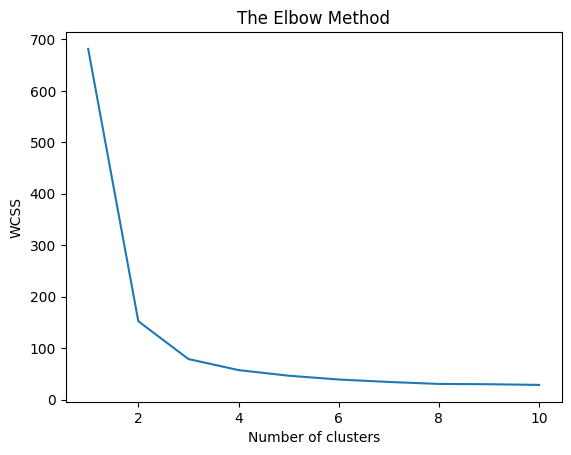

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#apply algorithm
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

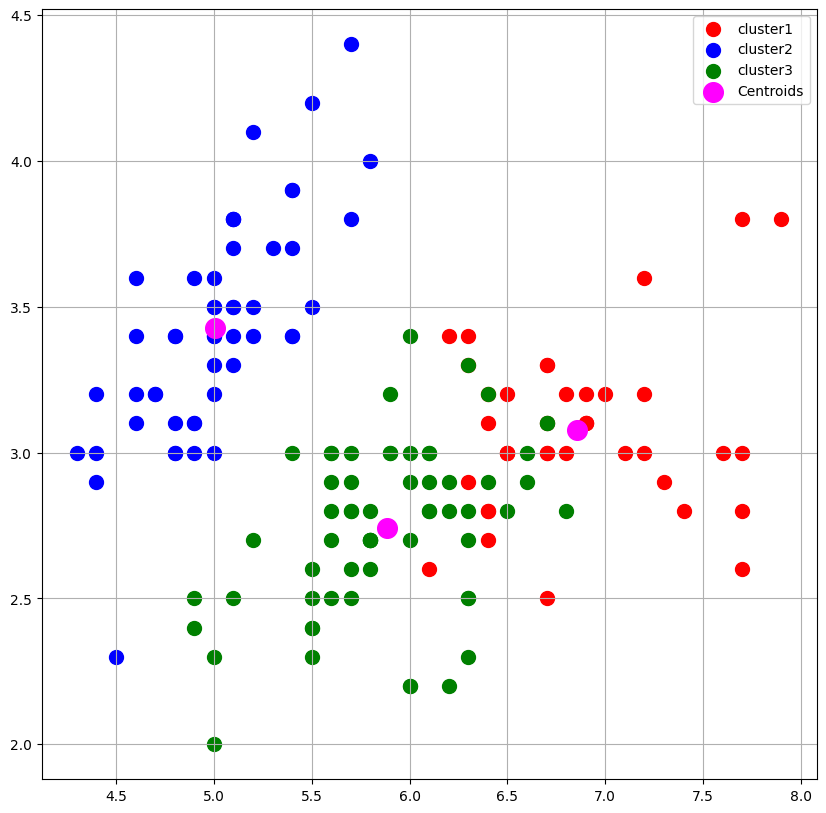

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='magenta',label='Centroids')
plt.legend()
plt.grid()
plt.show()


2)hierarchical

In [ ]:
x=iris.iloc[:,:-1].values

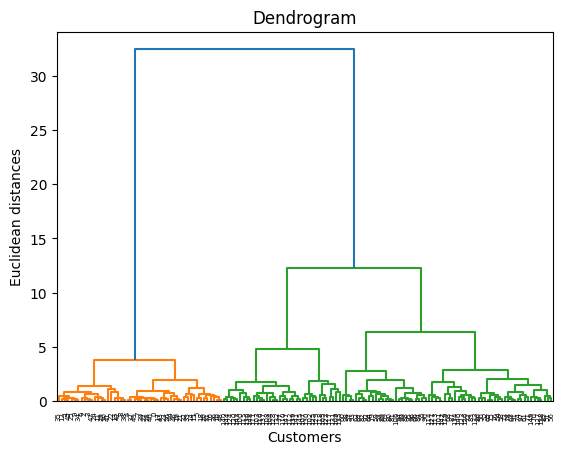

In [ ]:
#algo import
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,linkage='ward')
y_hc=hc.fit_predict(x)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

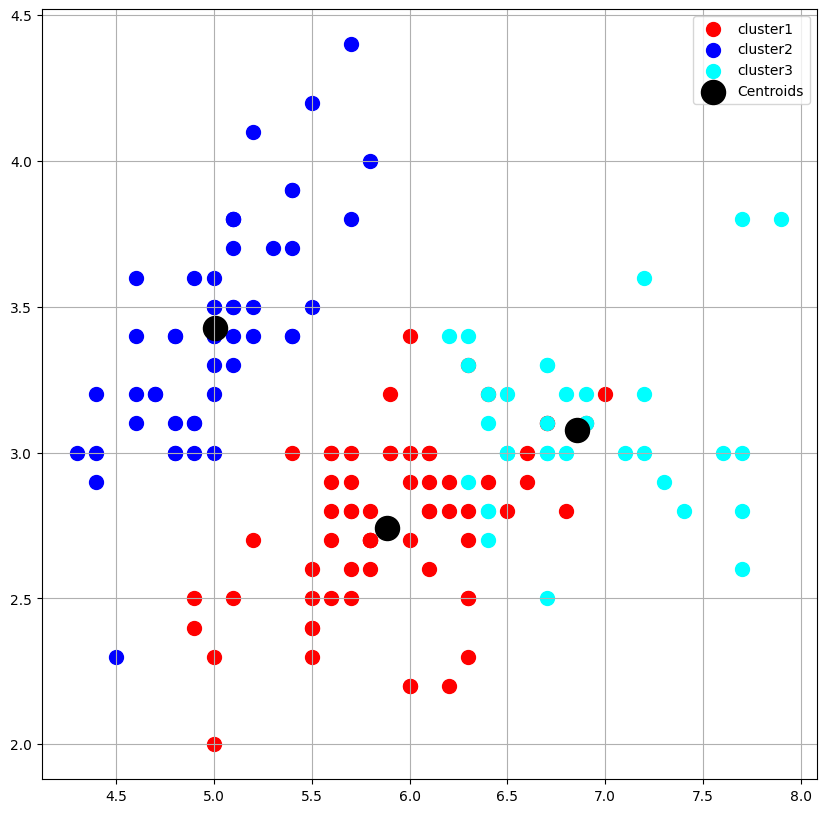

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_hc == 0,0],x[y_hc == 0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_hc == 1,0],x[y_hc == 1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_hc == 2,0],x[y_hc == 2,1],s=100,c='cyan',label='cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()


DBSCAN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')[['sepal_length','sepal_width']]
iris.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

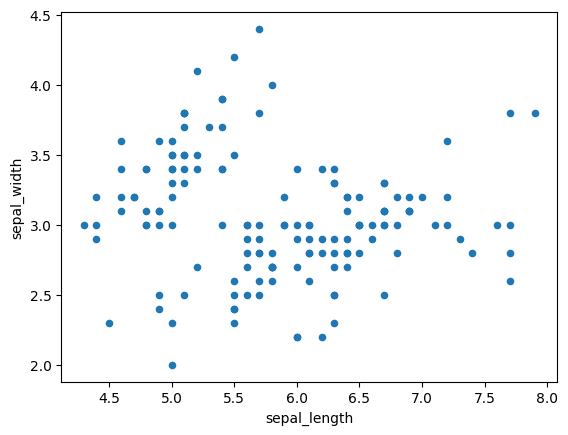

In [ ]:
iris.plot.scatter(x='sepal_length',y='sepal_width')

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3,min_samples=4,algorithm='brute',p=0.9)
y_dbscan=dbscan.fit_predict(x)

In [ ]:
labels=dbscan.labels_
labels

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,
       -1, -1,  2, -1, -1, -1, -1,  3, -1, -1,  2, -1,  1, -1,  3, -1,  2,
       -1,  2,  5, -1, -1,  1,  3,  3, -1, -1,  1, -1,  2,  2,  2, -1, -1,
       -1, -1, -1,  2,  2,  2,  1,  2, -1,  2,  2,  2, -1, -1,  2, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  4, -1, -1,  5,  4, -1,  5,  5, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  5, -1,  4, -1, -1,  4,  4, -1, -1, -1, -1,  5])

In [ ]:
len(dbscan.core_sample_indices_)

49

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

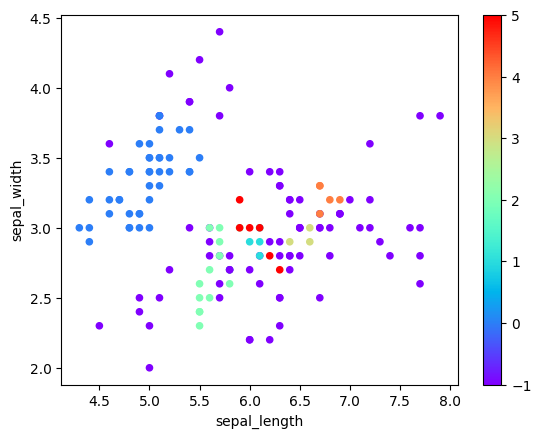

In [ ]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width',c=y_dbscan,cmap='rainbow')


In [ ]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_blobs

X_blobs, y_blobs = make_blobs()
df = pd.DataFrame(X_blobs, columns=['feature_1', 'feature_2'])
df.head()

,feature_1,feature_2
0,6.390954,-7.043636
1,5.648076,-7.963573
2,-4.665144,1.328090
3,-5.371628,0.587881
4,-3.671283,1.034124


In [ ]:
x=X_blobs

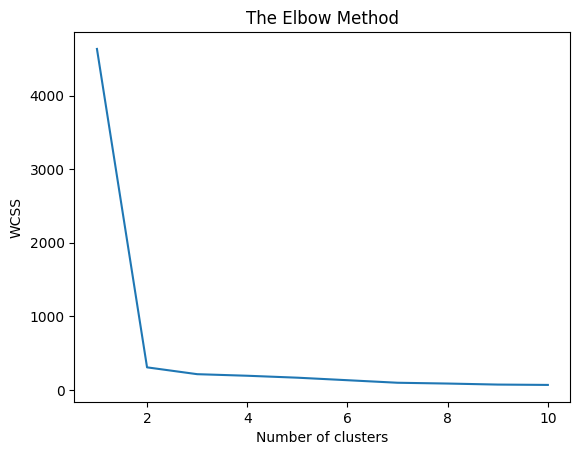

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#apply algorithm
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0,
       1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0,
       2, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0], dtype=int32)

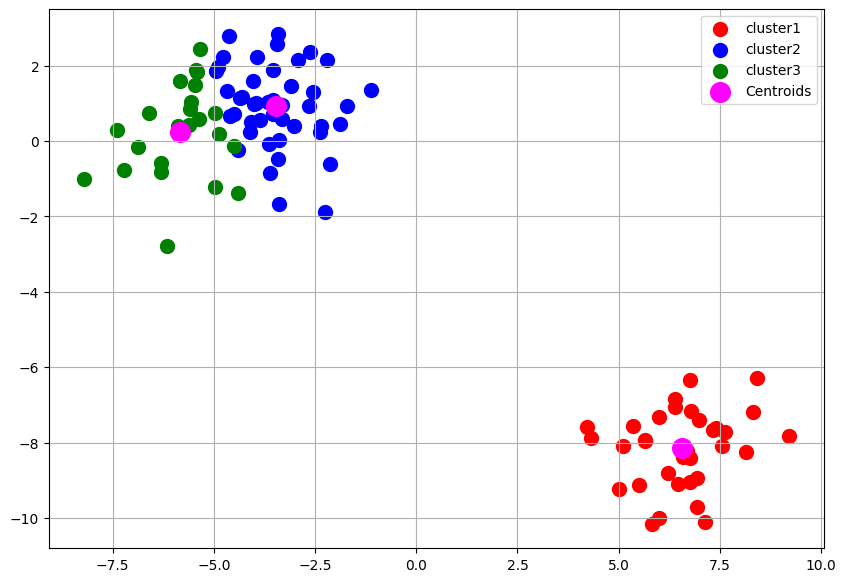

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='magenta',label='Centroids')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd_1=pd.read_csv('Live.csv')
pd_1.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
#drop last 4 columns
pd_1.drop(pd_1.columns[-4:],axis=1,inplace=True)
pd_1.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


kmeans

In [ ]:
x=pd_1.iloc[:,3:6].values

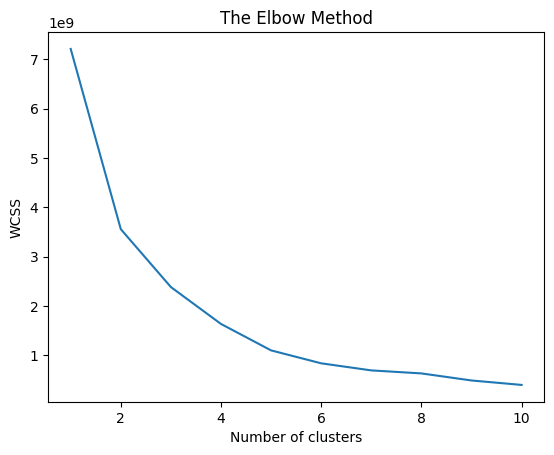

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

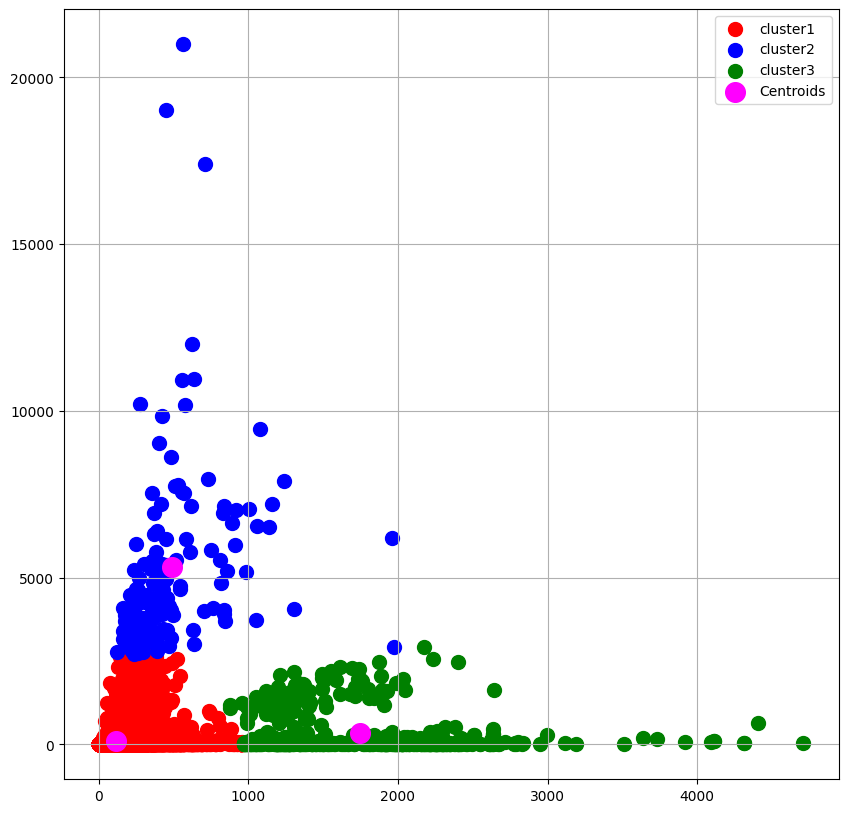

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='magenta',label='Centroids')
plt.legend()
plt.grid()
plt.show()

hierarchical

In [ ]:
x=pd_1.iloc[:,3:6].values

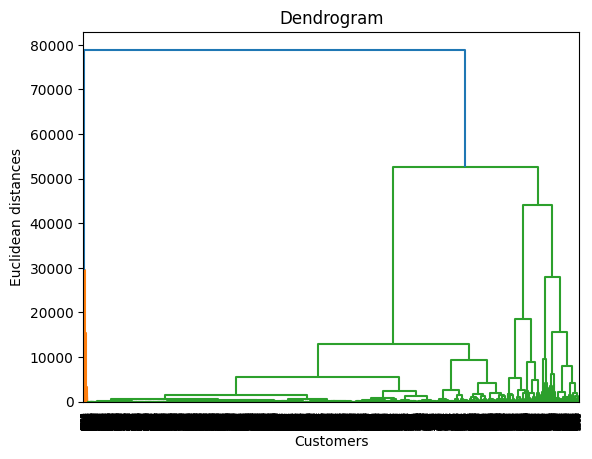

In [ ]:
#import algo
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,linkage='ward')
y_hc=hc.fit_predict(x)
y_hc

array([0, 2, 2, ..., 2, 2, 2])

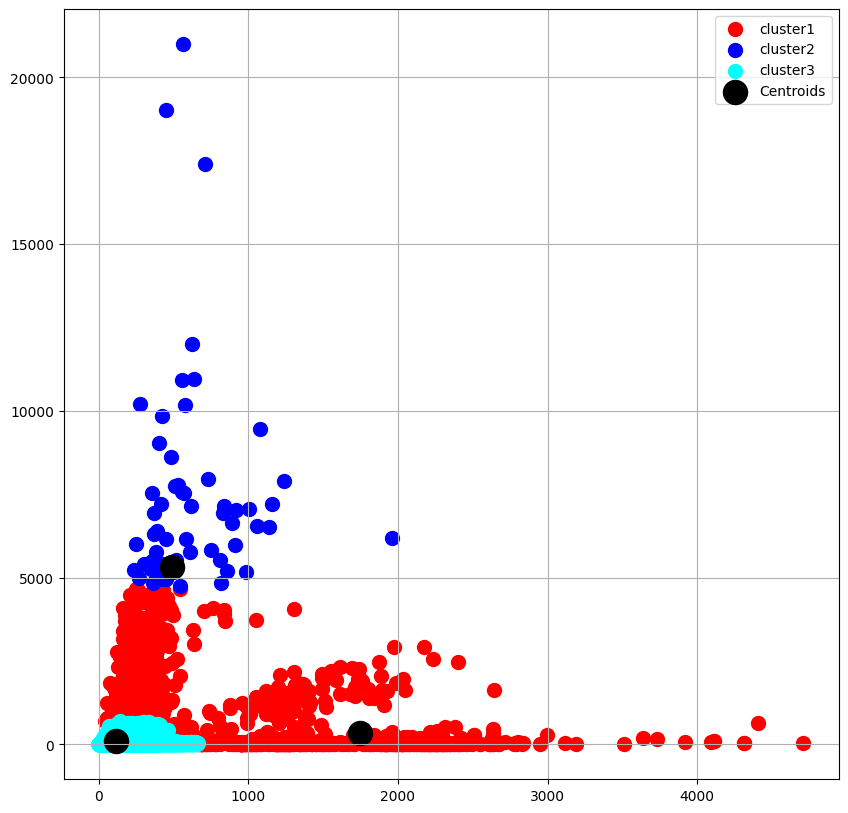

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_hc == 0,0],x[y_hc == 0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_hc == 1,0],x[y_hc == 1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_hc == 2,0],x[y_hc == 2,1],s=100,c='cyan',label='cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

DBSCAN

<Axes: xlabel='num_reactions', ylabel='num_likes'>

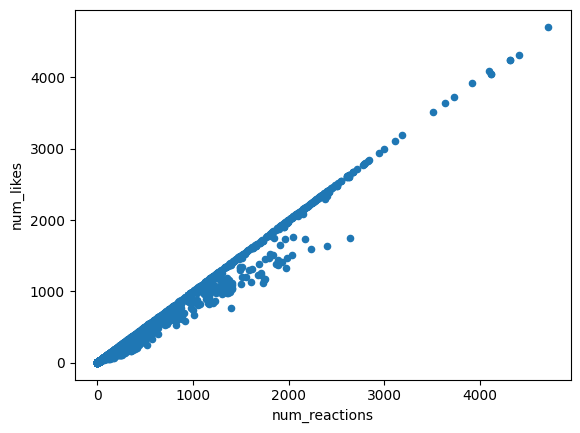

In [ ]:
#scatter plot
pd_1.plot.scatter(x='num_reactions',y='num_likes')

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3,min_samples=4,algorithm='brute',p=0.9)
y_dbscan=dbscan.fit_predict(x)

In [ ]:
labels=dbscan.labels_
labels

array([-1, -1, -1, ..., 59, -1, 68])

In [ ]:
len(dbscan.core_sample_indices_)

2340

<Axes: xlabel='num_reactions', ylabel='num_likes'>

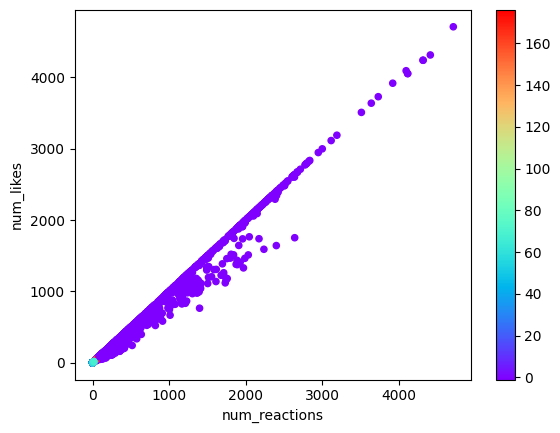

In [ ]:
pd_1.plot(kind='scatter',x='num_reactions',y='num_likes',c=y_dbscan,cmap='rainbow')

spectral clustring

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering

In [ ]:
#apply spectral modeling
spectral=SpectralClustering(n_clusters=3,affinity='nearest_neighbors',assign_labels='kmeans')
labels=spectral.fit_predict(x)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


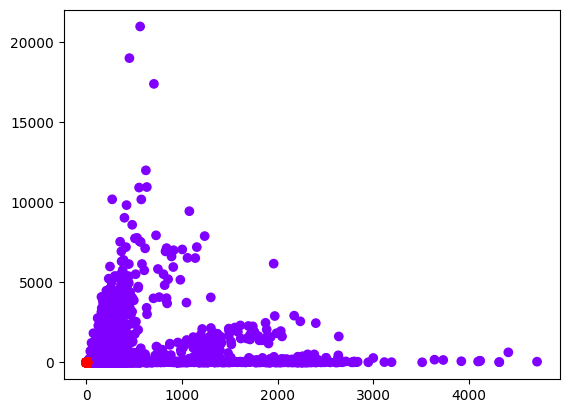

In [ ]:
plt.scatter(x[:,0],x[:,1],c=labels,cmap='rainbow')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [ ]:
#apply spectral modeling
spectral=SpectralClustering(n_clusters=3,affinity='nearest_neighbors',assign_labels='kmeans')
labels=spectral.fit_predict(x_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


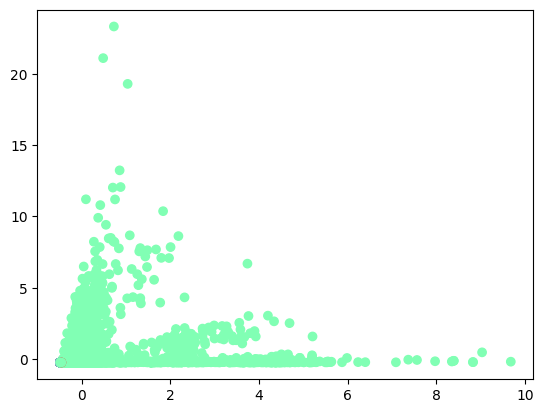

In [ ]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=labels,cmap='rainbow')
plt.show()

In [ ]:
#pca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [ ]:
#feature scaling
# Ensure x is set to the 3-feature data from pd_1 for PCA
x = pd_1.iloc[:,3:6].values
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [ ]:
#apply PCA 2D
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

In [ ]:
#3D
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x_scaled)

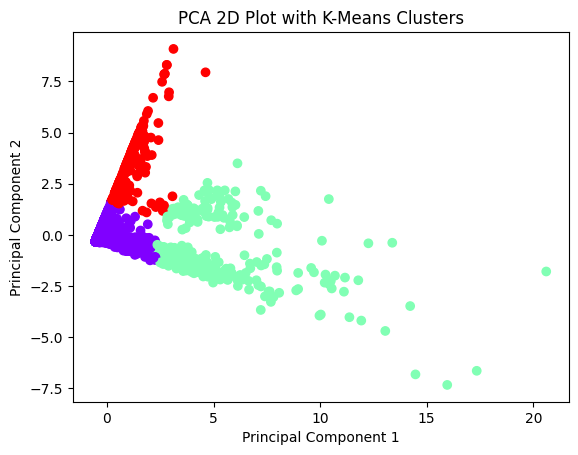

In [ ]:
#2D plot
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init='auto')
y_kmeans_pca = kmeans_pca.fit_predict(x_scaled) # Apply KMeans to the scaled data that PCA was applied to

plt.scatter(x_pca[:,0],x_pca[:,1],c=y_kmeans_pca,cmap='rainbow')
plt.title('PCA 2D Plot with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

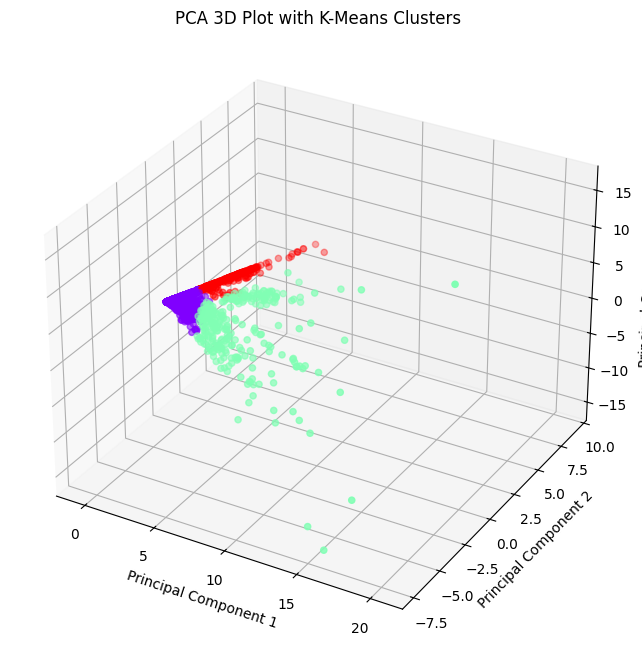

In [ ]:
#3D plot
# Re-apply PCA with 3 components to ensure x_pca has 3 dimensions for 3D plotting
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x_scaled)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_kmeans_pca,cmap='rainbow')
plt.title('PCA 3D Plot with K-Means Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()